### Experiments

#### Import Libraries

In [5]:
from utils.data_utils import split_dataset, TimeSeriesDataset
from utils.evaluation_utils import plot_multistep_forecast, evaluate_on_test_data
from utils.training_utils import train
import pandas as pd 
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

#### Import Data

In [6]:
ETTh1 = pd.read_csv("/workspaces/time_series_experiment/ETT-small/ETTh1.csv")
training_df, val_df, test_df = split_dataset(ETTh1, remain_same = False)

#### Multivariate Case

#### Global Parameters

In [4]:
p_lag = 24
future_steps = round(12)
batch_size = 8
epochs = 8
learning_rate=1.e-4
decomp_kernel_size = 24
number_of_forecasts = 100
target_column = ['OT']
feature_columns = [i for i in training_df.columns]

#### ETTh1

#### RLinear

Random seed set as 42
Rlinear activated


Current learning rate is : 0.0001
---------------------------
Current (running) training loss at iteration 5000 : 6.246913323116303

Epoch 0: 

Train metrics: -------
Running (training) loss is 5.237615145592515.
Training MAE is 0.6129712645203695.
Training MSE is 5.282165210810277.
Training MAPE is 1263533653.5380757.

Val metrics: -------
Running (validation) loss is 2.6769712415042815.
Validation MAE is 0.4479085769872744.
Validation MSE is 2.7286479961086108.
Validation MAPE is 0.03490385568475576.
---------------------------
Current learning rate is : 5e-05
---------------------------
Current (running) training loss at iteration 5000 : 3.4594820307731626

Epoch 1: 

Train metrics: -------
Running (training) loss is 3.1488344675083773.
Training MAE is 0.48232684608446347.
Training MSE is 3.207598283941593.
Training MAPE is 958769981.3379494.

Val metrics: -------
Running (validation) loss is 1.9928943615529564.
Validation MAE is 0.38568215330059713.
Validation MSE is 2.042179918796

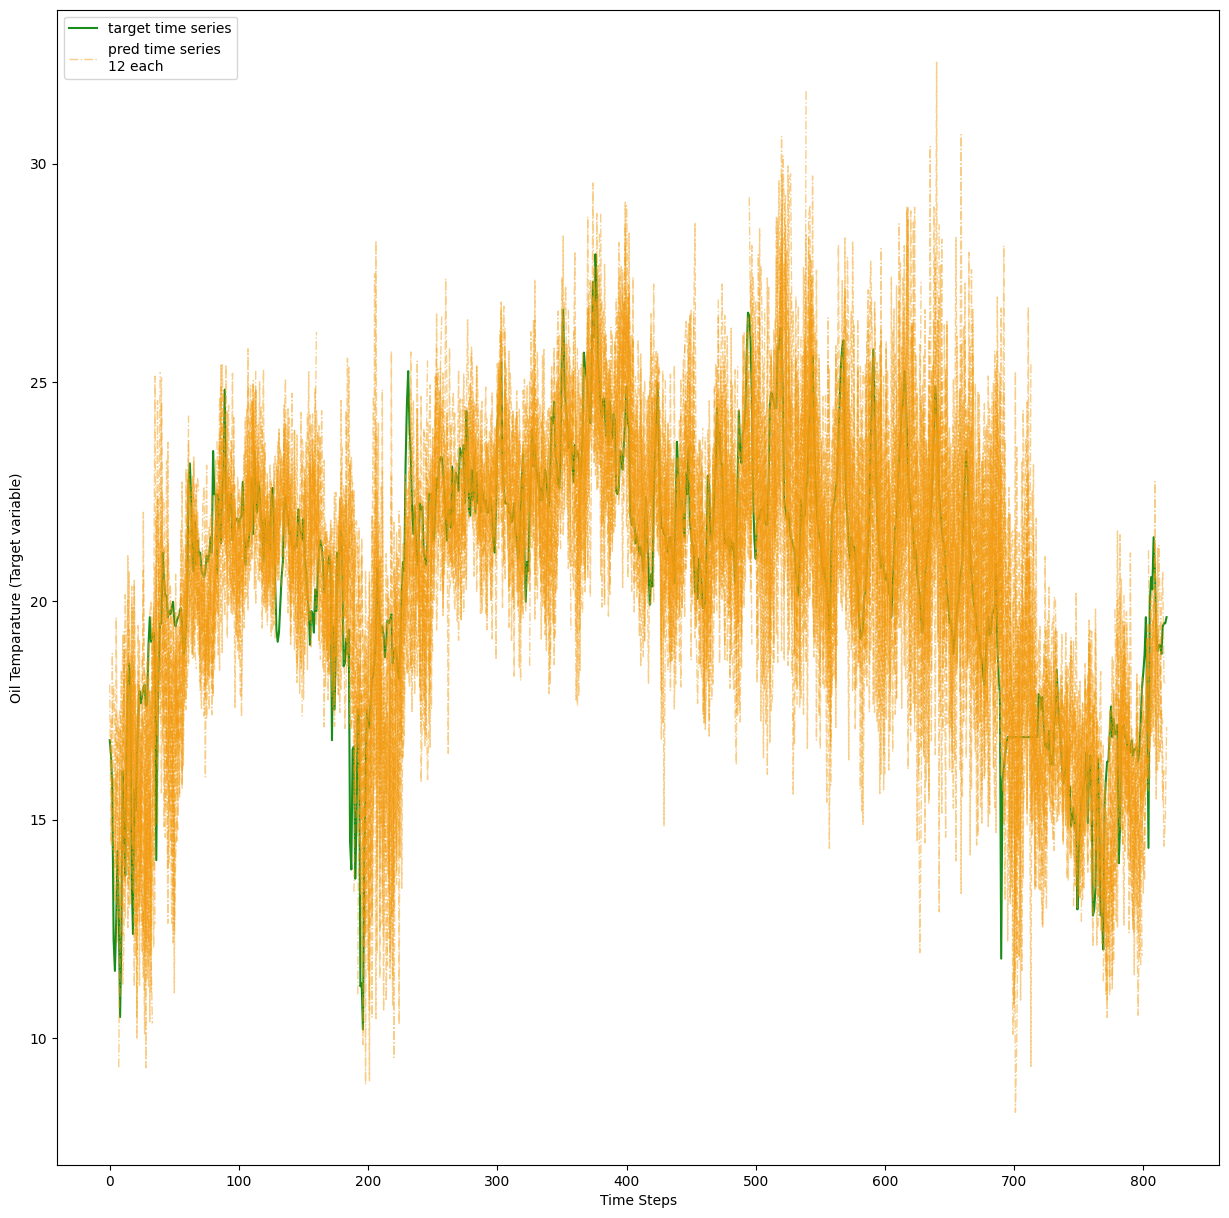

In [7]:
net, res = train(
            epochs = epochs, 
            n_continous_features=7, 
            n_categorial_features=5,
            p_lag=  p_lag, 
            future_steps = future_steps, 
            training_df = training_df, 
            validation_df = val_df, 
            feature_columns = feature_columns,
            target_column = target_column, 
            learning_rate=learning_rate ,
            decomp_kernel_size= decomp_kernel_size, 
            batch_size=batch_size, 
            get_residuals = True, 
            model = 'rlinear'
            )

test_data = DataLoader(TimeSeriesDataset(val_df,future_steps= future_steps, target_column = target_column,feature_columns=feature_columns,p_lag=p_lag), batch_size=batch_size,drop_last=True)
plot_multistep_forecast(test_data=test_data, neural_net=net, future_steps=future_steps, number_of_forecasts=number_of_forecasts)
#evaluate_on_test_data(test_data = test_data, neural_net = net)

#### Dlinear

Random seed set as 42
Dlinear activated
Current learning rate is : 0.0001
---------------------------


Current (running) training loss at iteration 5000 : 8.793661497020722

Epoch 0: 

Train metrics: -------
Running (training) loss is 6.299287606051209.
Training MAE is 0.6290624280041511.
Training MSE is 6.303904870617281.
Training MAPE is 1036985213.4618735.

Val metrics: -------
Running (validation) loss is 3.6019724076920814.
Validation MAE is 0.5378158894050252.
Validation MSE is 3.6439796280074908.
Validation MAPE is 0.04453414357727864.
---------------------------
Current learning rate is : 5e-05
---------------------------
Current (running) training loss at iteration 5000 : 3.598571922779083

Epoch 1: 

Train metrics: -------
Running (training) loss is 3.091668811030344.
Training MAE is 0.4911339035548201.
Training MSE is 3.151521747265387.
Training MAPE is 995106122.7245182.

Val metrics: -------
Running (validation) loss is 3.0683628581054916.
Validation MAE is 0.4976856775663711.
Validation MSE is 3.123410404055983.
Validation MAPE is 0.040859349276665805.
--------------------

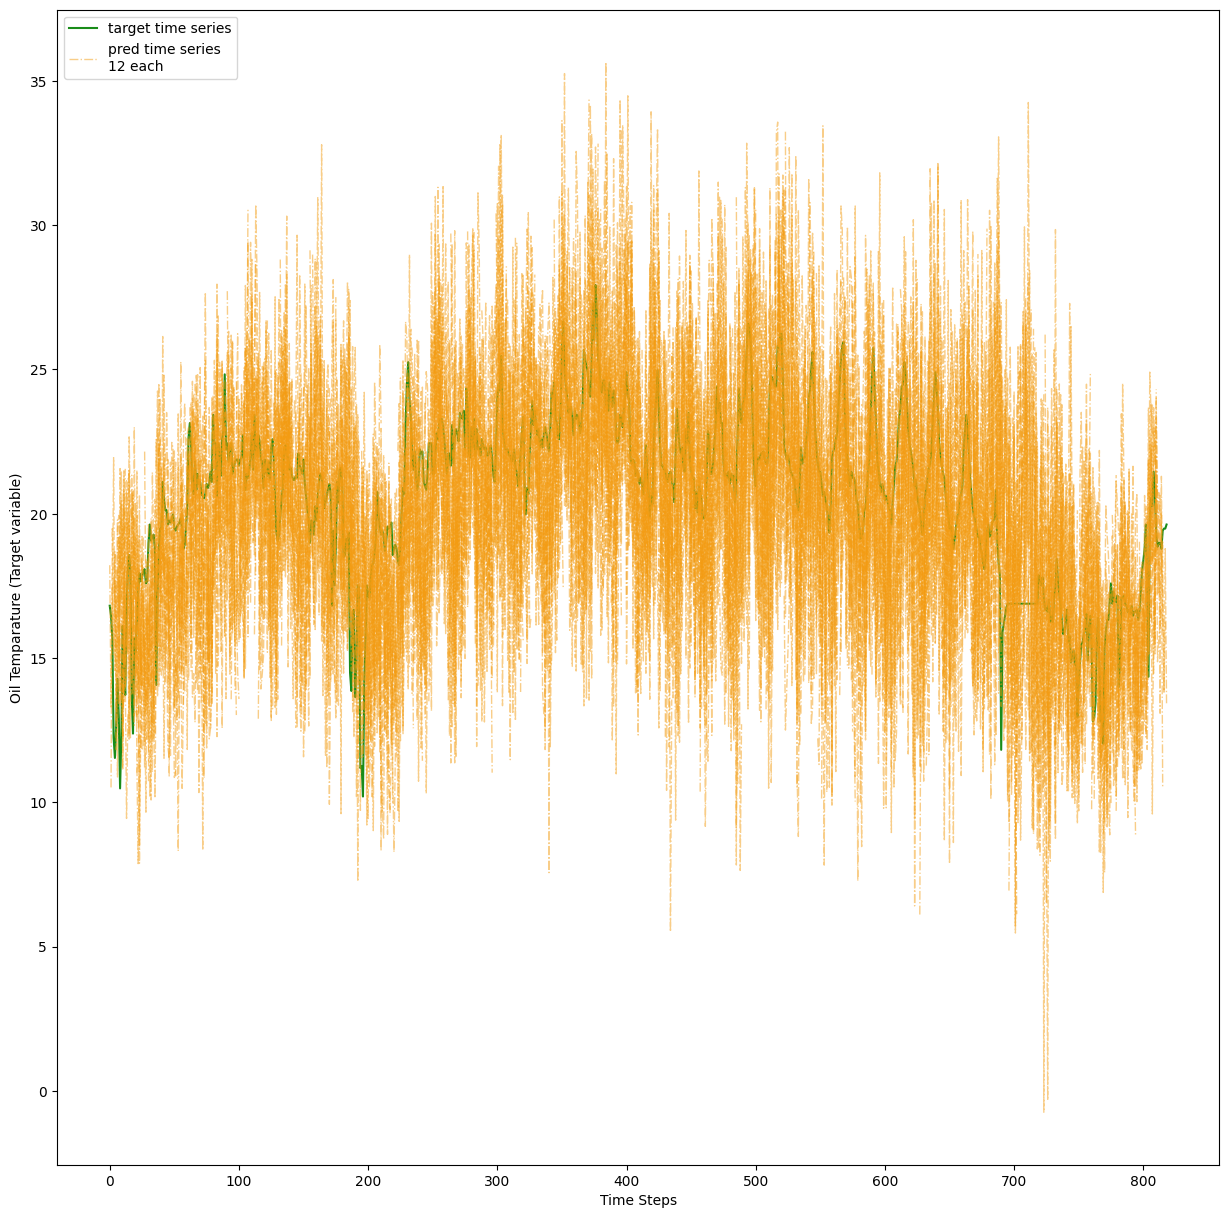

In [8]:
net, res = train(
            epochs = epochs, 
            n_continous_features=7, 
            n_categorial_features=5,
            p_lag=  p_lag, 
            future_steps = future_steps, 
            training_df = training_df, 
            validation_df = val_df, 
            feature_columns = feature_columns,
            target_column = target_column, 
            learning_rate=learning_rate ,
            decomp_kernel_size= decomp_kernel_size, 
            batch_size=batch_size, 
            get_residuals = True, 
            model = 'dlinear'
            )

test_data = DataLoader(TimeSeriesDataset(val_df,future_steps= future_steps, target_column = target_column,feature_columns=feature_columns,p_lag=p_lag), batch_size=batch_size,drop_last=True)
plot_multistep_forecast(test_data=test_data, neural_net=net, future_steps=future_steps, number_of_forecasts=number_of_forecasts)
evaluate_on_test_data(test_data = test_data, neural_net = net)

#### RLMP

Random seed set as 42
RMLP activated
Current learning rate is : 0.0001
---------------------------


Current (running) training loss at iteration 5000 : 8.564432824707032

Epoch 0: 

Train metrics: -------
Running (training) loss is 5.957673673454774.
Training MAE is 0.6211281304512549.
Training MSE is 5.961619411682317.
Training MAPE is 1154153511.5030937.

Val metrics: -------
Running (validation) loss is 1.318399122619367.
Validation MAE is 0.31743628936973245.
Validation MSE is 1.3621364420095643.
Validation MAPE is 0.02523219288623595.
---------------------------
Current learning rate is : 5e-05
---------------------------
Current (running) training loss at iteration 5000 : 1.6070589019298553

Epoch 1: 

Train metrics: -------
Running (training) loss is 1.4094479053734092.
Training MAE is 0.32617159280755104.
Training MSE is 1.4754928055227896.
Training MAPE is 686113438.0887097.

Val metrics: -------
Running (validation) loss is 0.7275090148201683.
Validation MAE is 0.23715508027145496.
Validation MSE is 0.7786888573728092.
Validation MAPE is 0.018794786979464795.
--------------

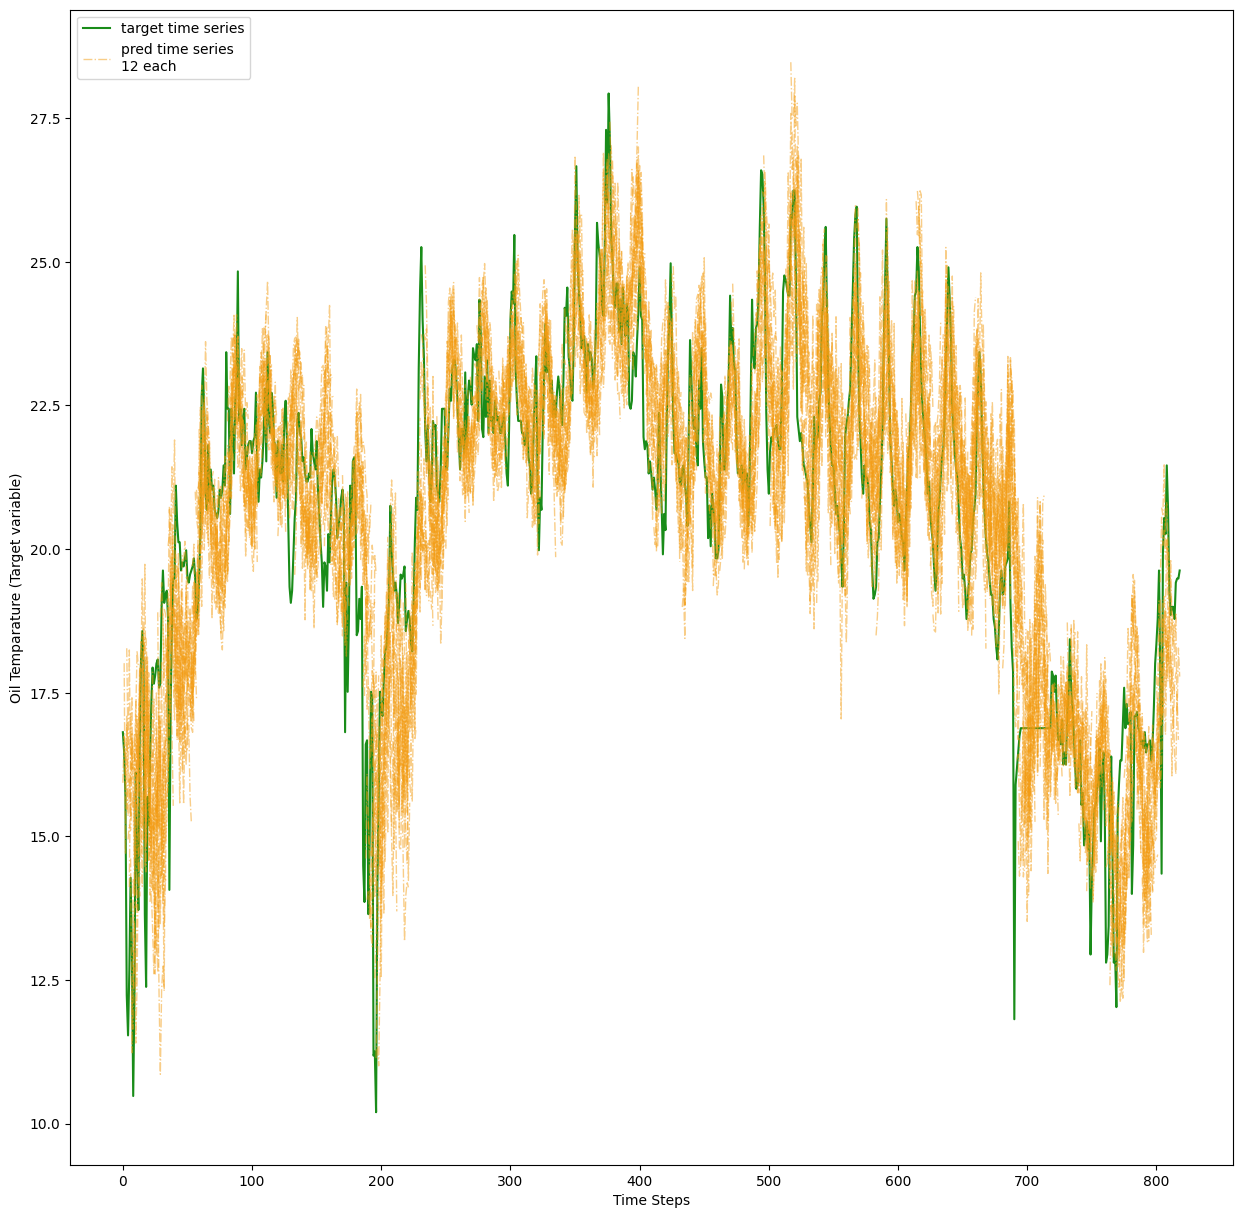

In [9]:
net, res = train(
            epochs = epochs, 
            n_continous_features=7, 
            n_categorial_features=5,
            p_lag=  p_lag, 
            future_steps = future_steps, 
            training_df = training_df, 
            validation_df = val_df, 
            feature_columns = feature_columns,
            target_column = target_column, 
            learning_rate=learning_rate ,
            decomp_kernel_size= decomp_kernel_size, 
            batch_size=batch_size, 
            get_residuals = True, 
            model = 'rmlp'
            )

test_data = DataLoader(TimeSeriesDataset(val_df,future_steps= future_steps, target_column = target_column,feature_columns=feature_columns,p_lag=p_lag), batch_size=batch_size,drop_last=True)
plot_multistep_forecast(test_data=test_data, neural_net=net, future_steps=future_steps, number_of_forecasts=number_of_forecasts)
evaluate_on_test_data(test_data = test_data, neural_net = net)